# Simple ML: Regression
<font size=3>When using Zumi with <font face="Courier">forward()</font>, you can only give Zumi commands in terms of duration and speed. What if you measured that the distance to your target is 10.5 inches? How many seconds should you drive (and at which speed) to arrive at your target? You need to know the relationship between duration and distance traveled. In this lesson, you will collect data from your Zumi and see how you can use basic machine learning to predict the time needed to travel a specified distance </font>

## Import libraries

<font size=3>Import the Zumi library. You will also need to import <font face="Courier">matplotlib</font> which will handle all of our graphs.</font>

In [2]:
from zumi.zumi import Zumi
import matplotlib.pyplot as plt
zumi = Zumi()

Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated


## How do we plot data?
<font size=3> When we plot data, we have a list of ordered pairs, or a table of x and y values, that we plot on a graph. In a math class, you may have a table like this:
    
<table style="width:50%">
  <tr>
    <th>Temperature (x)</th>
    <th>Ice cream sales (y)</th> 
  </tr>
    <tr>
    <td>60</td>
    <td>15</td>
  </tr>
  <tr>
    <td>62</td>
    <td>20</td>
  </tr>
     <tr>
    <td>64</td>
    <td>22</td>
  </tr>
     <tr>
    <td>65</td>
    <td>26</td>
  </tr>
     <tr>
    <td>70</td>
    <td>34</td>
  </tr>
    <tr>
    <td>74</td>
    <td>39</td>
  </tr>
    <tr>
    <td>82</td>
    <td>59</td>
  </tr>
 
</table>

<br>

Then you would plot the ordered pairs onto a graph and find the relationship between these two sets of data by drawing a line or curve that best fits the data. In this case, the relationship between temperature and ice cream sales is linear. You can use the plot to predict the sales of ice cream based on the temperature! 

<img src="best_fit_example.png" width=500>

Remember when you learned about **lists** in the lesson about IR? Lists are a data structure that can hold lots of data. They look like a variable but they are initialized with brackets <font face="Courier"> []</font>. While in math class you might make a table, how can we tell the computer we have two sets of data we want to plot? You would use lists like the ones below: <br><br>
<font face="Courier">
x = [60,62,64,65,70,74,82] <br>
y = [15,20,22,26,34,39,59] <br>
</font>

This is how we are going to save our data that we take when we measure distances with Zumi. Get your ruler ready! </font>

## Code

### List initializiation

<font size=3>Instead of x and y, we are going to have two lists: one to hold information about the duration Zumi drove and one for the distance Zumi drove. Use empty brackets to indicate that the list is empty at the start of your program.</font> 

In [ ]:
duration = []
distance = []


### List operations

<font size=3> How do you add data to a list? There is a list opperation called <font face="Courier"> append() </font> which you will use to add data to our "x" and "y" lists. To use the function, <font face="Courier"> append() </font> is called as a method of the list name. For example, here is a list with three numbers. Run the code to see the output. </font>

In [1]:
numbers = [5,2,8]
print(numbers)

[5, 2, 8]


<font size=3> Here is how you append a number to the list. Call <font face="Courier"> append() </font> with the name of the list you are modifying:
    
   <font face="Courier"> numbers.append(78) </font> <br>

Now append any number you would like to the list and reprint the list to see the added value: </font>

In [2]:
numbers.append(56)
print(numbers)

[5, 2, 8, 56]


## Data collection
Now you will collect data of Zuma driving from 0.5 duration to 2.0 duration. To help automate the process, there is a while loop that will continue until time is 2.1 seconds. Set up Zumi parallel to a ruler and take your data. Make sure to input everything correctly!

In [7]:
while time < 2.1:
    zumi.forward(duration=time)
    duration.append(time)
    dist = input("Input distance in inches for " + str(time) + "seconds: ")
    distance.append(float(dist))
    go_again = input("Press 'enter' to run again: ")
    time += 0.1

    

Input distance in inches for 0.5seconds: 3.0
Enter to calibrate and run again
Input distance in inches for 0.6seconds: 3.75
Enter to calibrate and run again
Input distance in inches for 0.7seconds: 4.125
Enter to calibrate and run again
Input distance in inches for 0.7999999999999999seconds: 4.875
Enter to calibrate and run again
Input distance in inches for 0.8999999999999999seconds: 5.375
Enter to calibrate and run again
Input distance in inches for 0.9999999999999999seconds: 6.25
Enter to calibrate and run again
Input distance in inches for 1.0999999999999999seconds: 6.813
Enter to calibrate and run again
Input distance in inches for 1.2seconds: 7.75
Enter to calibrate and run again
Input distance in inches for 1.3seconds: 8.5
Enter to calibrate and run again
Input distance in inches for 1.4000000000000001seconds: 8.875
Enter to calibrate and run again
Input distance in inches for 1.5000000000000002seconds: 9.875
Enter to calibrate and run again
Input distance in inches for 1.600000

In [ ]:
plt.plot(duration,distance)
plt.show()

In [1]:
import matplotlib.pyplot as plt

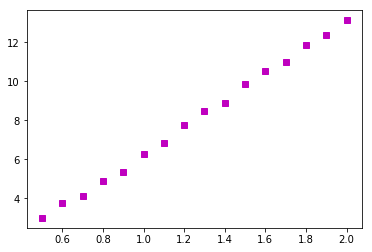

In [5]:
x = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
y = [3.0, 3.75, 4.125, 4.875, 5.375, 6.25, 6.813, 7.75, 8.5, 8.875, 9.875, 10.5, 11.0, 11.875, 12.375, 13.125]
plt.plot(x,y, 'ms')
plt.show()

Now try to draw a imaginary line that represents this data. What would it look like?

In [8]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line: y = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

_intercept, _slope = best_fit(x,y)



best fit line: y = -0.55 + 6.84x


(-0.5495735294117576, 6.842808823529406)

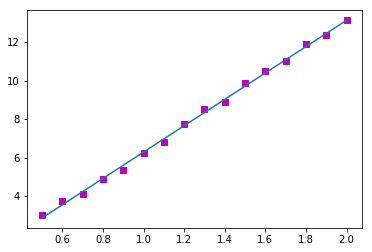

In [14]:
approx = []
for data in x:
    approx.append(-0.55 + (6.84*data))

plt.plot(x,y, 'ms')
plt.plot(x,approx)
plt.show()                  

    

<font size =3> Now you have a way to estimate distance traveled from seconds driven. You will need a new function <font face="Courier">move_inches()</font> to make the conversion. Given the distance you want to drive, you can solve for the variable <font face="Courier"> duration </font> by rearranging the equation of the line.
    
<img src="algebra.png" width=500>

Remember that "x" is a variable for the number of seconds you need to drive and "y" is the distance traveled in *inches*.

In [ ]:
def move_inches(distance,angle):
    y_intercept = _intercept
    slope = _slope
    duration = (distance + y_intercept)/slope
    zumi.forward(40,duration,angle)   

## Why is this machine learning?
<font size=3> You may not believe it, but the mathematical process that the computer just performed to find the best estimate was an example of very simple machine learning.